In [15]:
import pandas as pd
df=pd.read_csv('E:\\TE_Project\\datacsv\\India.csv',index_col='date_time',parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()
df

Shape of data (2009, 24)


,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
date_time,,,,,,,,,,,,,,,,,,,,,
2015-01-01,24,11,0.0,8.7,5,72,02:39 PM,03:24 AM,07:14 AM,05:36 PM,...,10,14,37,0.0,1017,24,10,63,6,India
2015-01-02,18,11,0.0,5.5,3,80,03:27 PM,04:21 AM,07:14 AM,05:36 PM,...,15,60,62,1.7,1019,18,8,96,10,India
2015-01-03,19,13,0.0,8.7,5,87,04:16 PM,05:16 AM,07:15 AM,05:37 PM,...,8,38,82,0.0,1018,19,10,113,5,India
2015-01-04,23,13,0.0,8.7,5,94,05:08 PM,06:08 AM,07:15 AM,05:38 PM,...,18,1,60,0.0,1019,23,10,322,12,India
2015-01-05,21,10,0.0,8.7,5,100,06:01 PM,06:57 AM,07:15 AM,05:38 PM,...,23,0,48,0.0,1016,21,10,296,16,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,43,33,0.0,14.0,8,44,11:18 AM,No moonset,05:26 AM,07:23 PM,...,19,44,31,0.3,994,43,10,235,16,India
2020-06-28,45,34,0.0,12.2,9,52,12:20 PM,12:11 AM,05:26 AM,07:23 PM,...,19,30,32,0.5,994,45,10,244,16,India
2020-06-29,43,38,0.0,13.3,9,59,01:24 PM,12:48 AM,05:27 AM,07:23 PM,...,15,34,31,2.0,995,43,10,245,13,India


In [16]:
df=df[['tempC']]
df

,tempC
date_time,
2015-01-01,24
2015-01-02,18
2015-01-03,19
2015-01-04,23
2015-01-05,21
...,...
2020-06-27,43
2020-06-28,45
2020-06-29,43


<AxesSubplot:xlabel='date_time'>

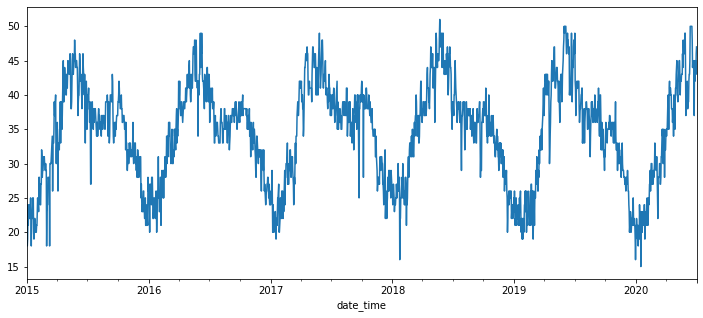

In [17]:
df['tempC'].plot(figsize=(12,5))

In [18]:
train=df[:-24]
test=df[-24:-12]

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)


MinMaxScaler()

In [20]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [21]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 24
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [22]:
#To give an idea of what generator file holds:
X,y = generator[0]

In [23]:
# We can see that the x array gives the list of values that we are going to predict y of:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.25       0.08333333 0.11111111 0.22222222 0.16666667 0.25
 0.25       0.25       0.19444444 0.19444444 0.25       0.27777778
 0.22222222 0.08333333 0.19444444 0.22222222 0.19444444 0.27777778
 0.27777778 0.27777778 0.13888889 0.11111111 0.13888889 0.19444444]
Predict this y: 
 [[0.19444444]]


In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [25]:
# defining the model(note that  I am using a very basic model here, a 2 layer model only):
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Fitting the model with the generator object:
model.fit_generator(generator,epochs=5)

c:\users\muskan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1961/1961 [==============================] - 25s 12ms/step - loss: 0.0192
Epoch 2/5
1961/1961 [==============================] - 25s 13ms/step - loss: 0.0049
Epoch 3/5
1961/1961 [==============================] - 25s 13ms/step - loss: 0.0046
Epoch 4/5
1961/1961 [==============================] - 25s 13ms/step - loss: 0.0043
Epoch 5/5
1961/1961 [==============================] - 25s 13ms/step - loss: 0.0044


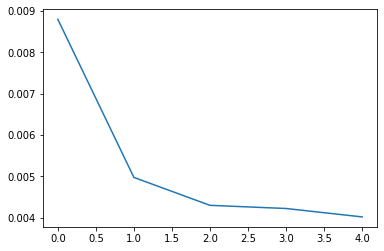

In [27]:
import matplotlib.pyplot as plt
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [29]:
import numpy as np
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    
    current_pred = model.predict(current_batch)[0]
    
    
    test_predictions.append(current_pred) 
    
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [30]:
true_predictions = scaler.inverse_transform(test_predictions)

In [31]:
test['Predictions'] = true_predictions

c:\users\muskan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


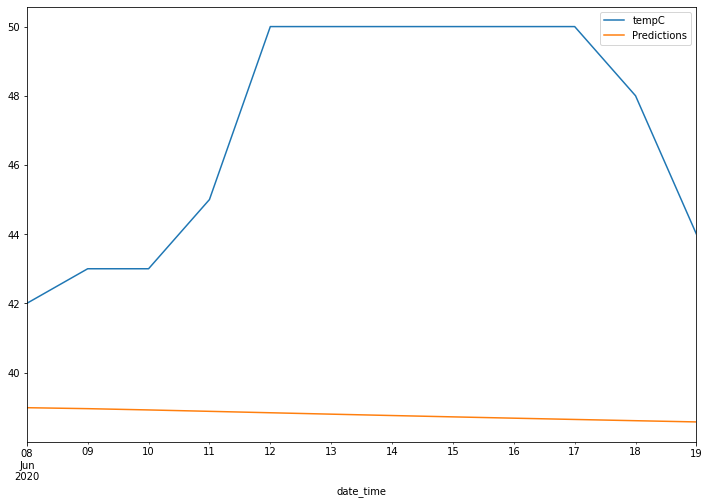

In [32]:
test.plot(figsize=(12,8))
plt.plot(true_predictions)

In [33]:
import numpy as np
from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(test['tempC'],test['Predictions']))
print('RMSE = ',RMSE)
print('df=',df['tempC'].mean())

RMSE =  8.935529626778845
df= 34.50970632155301


In [34]:
scaler.fit(df)
scaled_India_AQI=scaler.transform(df)

In [35]:
generator = TimeseriesGenerator(scaled_India_AQI, scaled_India_AQI, length=n_input, batch_size=1)

In [36]:
model.fit_generator(generator,epochs=5)


Epoch 1/5
   8/1985 [..............................] - ETA: 14s - loss: 0.0041

c:\users\muskan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


1985/1985 [==============================] - 25s 13ms/step - loss: 0.0041
Epoch 2/5
1985/1985 [==============================] - 26s 13ms/step - loss: 0.0040
Epoch 3/5
1985/1985 [==============================] - 26s 13ms/step - loss: 0.0039
Epoch 4/5
1985/1985 [==============================] - 25s 13ms/step - loss: 0.0039
Epoch 5/5
1985/1985 [==============================] - 25s 13ms/step - loss: 0.0039


In [37]:
test_predictions = []

first_eval_batch = scaled_India_AQI[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    
    current_pred = model.predict(current_batch)[0]
    
    
    test_predictions.append(current_pred) 
    
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [38]:
true_predictions = scaler.inverse_transform(test_predictions)

In [39]:
true_predictions=true_predictions.flatten()

In [48]:
true_preds=pd.DataFrame(true_predictions,columns=['Forecast'])
true_preds=true_preds.set_index(pd.date_range('2020-08-01',periods=12))

In [49]:
true_preds

,Forecast
2020-08-01,45.811880
2020-08-02,44.960129
2020-08-03,44.488062
2020-08-04,44.166873
2020-08-05,43.915087
2020-08-06,43.695989
2020-08-07,43.494855
2020-08-08,43.305747
2020-08-09,43.126006
2020-08-10,42.954405


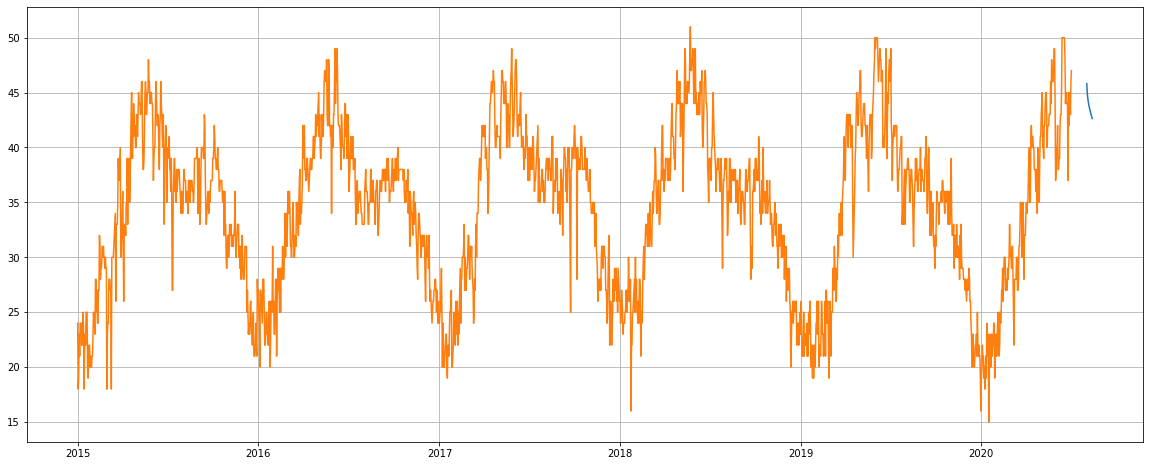

In [50]:

plt.figure(figsize=(20,8))
plt.grid(True)
plt.plot( true_preds['Forecast'])
plt.plot( df['tempC'])